In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
bank_data=pd.read_csv(r'C:\Users\Ganesh\Desktop\jupiter\ineuron\Project\Banking subscription\bank.csv',sep=';')

In [3]:
bank=bank_data.copy()

In [4]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.shape

(41188, 21)

In [6]:
# cheacking info
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
# cheacking null values
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
# cheaking the string type columns
stringtype=[]
for i in bank:
    if bank.dtypes[i]=='object':
        stringtype.append(i)
        
stringtype       

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [9]:
# cheacking unique value in columns
for i in stringtype:
    j=len(bank[i].unique())
    print(i,j)

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


In [10]:
# cheacking the values in job column
bank['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [11]:
# we removing the rows having value unknown
bank=bank.drop(bank.loc[bank['job']=='unknown'].index,axis=0)

In [12]:
bank.shape

(40858, 21)

In [13]:
# cheacking the values in marital columns
bank['marital'].value_counts()

married     24694
single      11494
divorced     4599
unknown        71
Name: marital, dtype: int64

In [14]:
# we remove value having unknown value
bank=bank.drop(bank.loc[bank['marital']=='unknown'].index,axis=0)

In [15]:
# cheacking the values in marital columns
bank['marital'].value_counts()

married     24694
single      11494
divorced     4599
Name: marital, dtype: int64

In [16]:
# we create only two category single and maried
def status(x):
    if x=='divorced' or x=='single':
        return 'single'
    else:
        return 'married'
stat=bank['marital']
bank['marital']=stat.map(status)

In [17]:
bank['marital'].value_counts()

married    24694
single     16093
Name: marital, dtype: int64

In [18]:
# cheacking the values in education columns
bank['education'].value_counts()


university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
unknown                 1596
illiterate                18
Name: education, dtype: int64

In [19]:
# removing the illiterate values rows
bank=bank.drop(bank.loc[bank['education']=='illiterate'].index,axis=0)

In [20]:
bank['education'].value_counts()

university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
unknown                 1596
Name: education, dtype: int64

In [21]:
 # cheacking the values in default columns
bank['default'].value_counts()

no         32337
unknown     8429
yes            3
Name: default, dtype: int64

In [22]:
# we remove the yes category bcz its very small value and not affect our prediction
bank=bank.drop(bank.loc[bank['default']=='yes'].index,axis=0)


In [23]:
 # cheacking the values in default columns
bank['loan'].value_counts()

no         33602
yes         6180
unknown      984
Name: loan, dtype: int64

In [24]:
bank['previous'].value_counts()

0    35199
1     4519
2      740
3      214
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [25]:
# removing the  unknown values
bank=bank.drop(bank.loc[bank['loan']=='unknown'].index,axis=0)

# Cheacking dataset type

In [26]:
# cheacking data set is balanced or not
bank['y'].value_counts()

no     35299
yes     4483
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

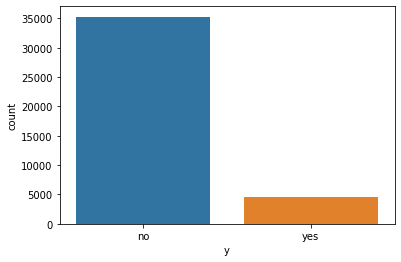

In [27]:
sns.countplot(bank['y'])

Look likes unbalanced data set

In [28]:
# listing numerical columns
num_col=[]
for i in bank:
    if bank.dtypes[i]!='object':
        num_col.append(i)
        
num_col        

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

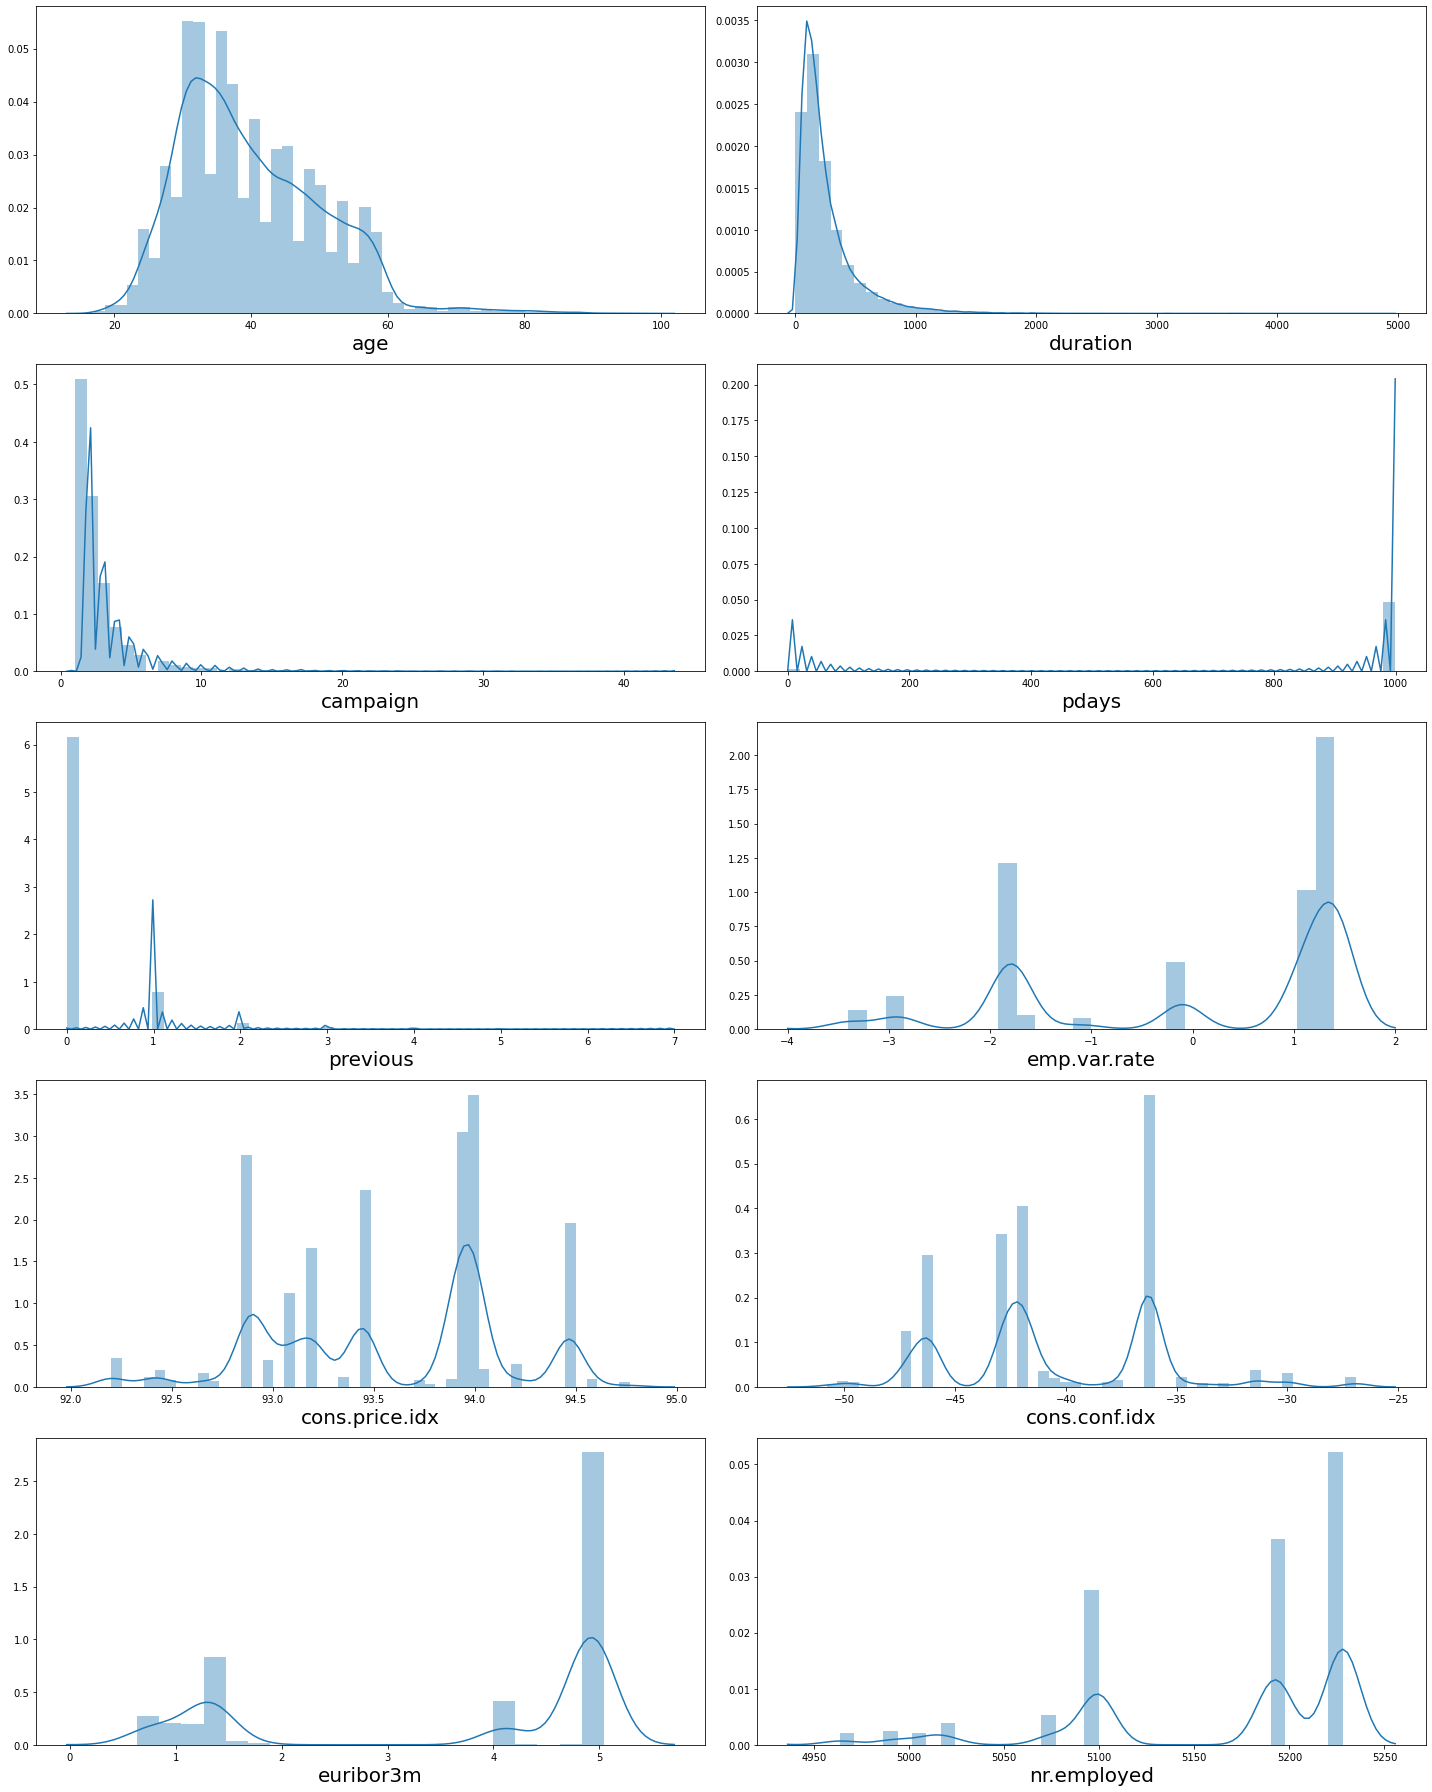

In [29]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in num_col:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        sns.distplot(bank[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

looks like pday feature not contrubute more

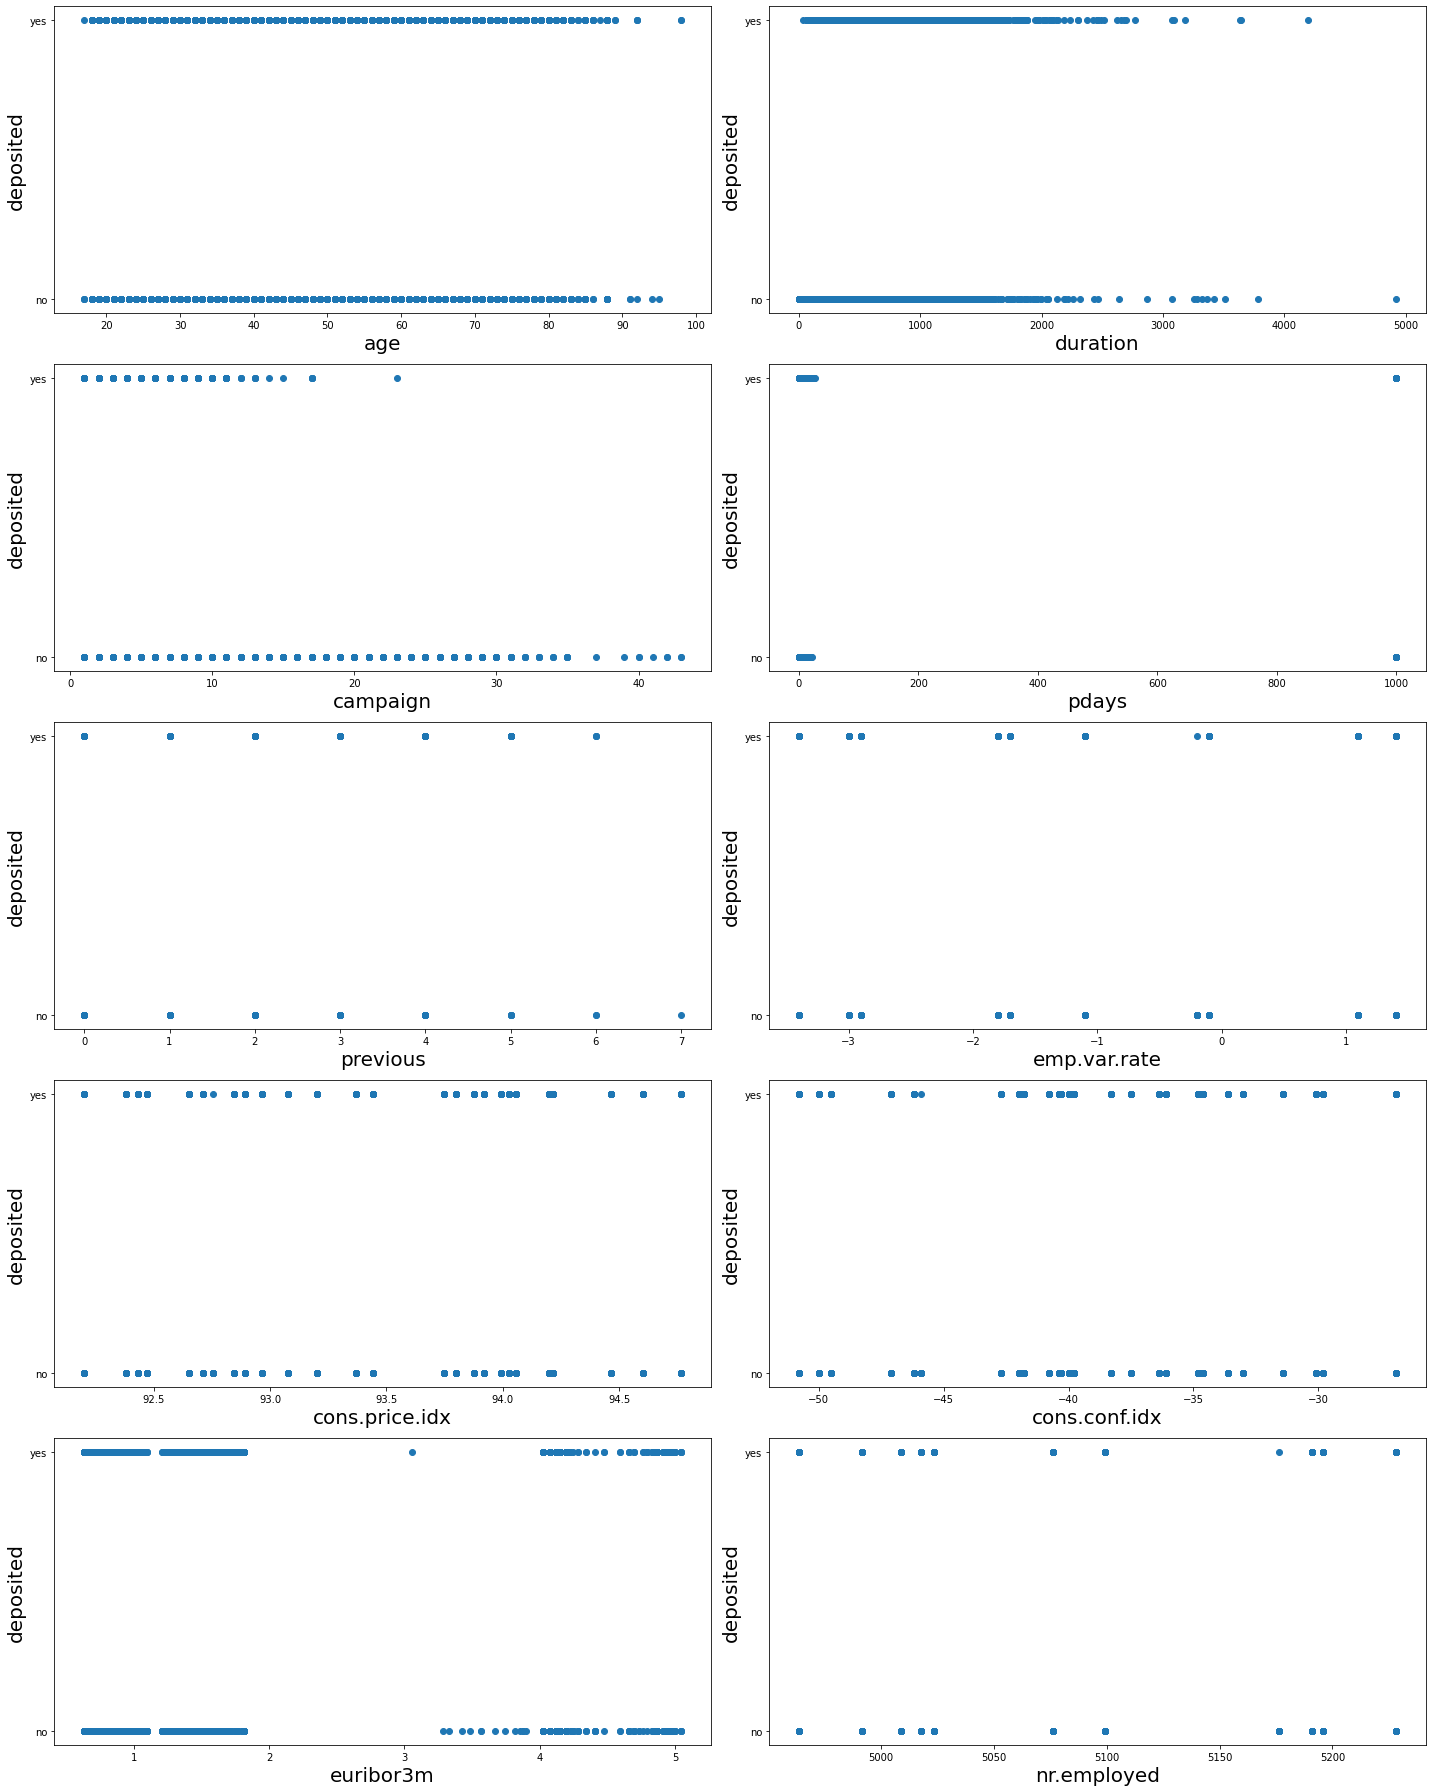

In [30]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in num_col:
    if plotnumber<=10 :
        ax = plt.subplot(5,2,plotnumber)
        plt.scatter(bank[column],bank['y'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('deposited',fontsize=20)
    plotnumber+=1
plt.tight_layout()

looks like distrubution of data is non linear

In [31]:
# cheacking the colinearity of numerical features
numrical_feature=bank[num_col]
from sklearn.preprocessing import StandardScaler

sclaer=StandardScaler()
n_scaled=sclaer.fit_transform(numrical_feature)
n_scaled

array([[ 1.54060342,  0.00947581, -0.56674038, ...,  0.8905552 ,
         0.71398779,  0.33197639],
       [ 1.63674809, -0.42237011, -0.56674038, ...,  0.8905552 ,
         0.71398779,  0.33197639],
       [-0.28614531, -0.12547604, -0.56674038, ...,  0.8905552 ,
         0.71398779,  0.33197639],
       ...,
       [ 1.54060342, -0.26813943, -0.20491496, ..., -2.220957  ,
        -1.49387499, -2.81718811],
       [ 0.38686738,  0.70736968, -0.56674038, ..., -2.220957  ,
        -1.49387499, -2.81718811],
       [ 3.27120749, -0.07535107,  0.15691047, ..., -2.220957  ,
        -1.49387499, -2.81718811]])

<AxesSubplot:>

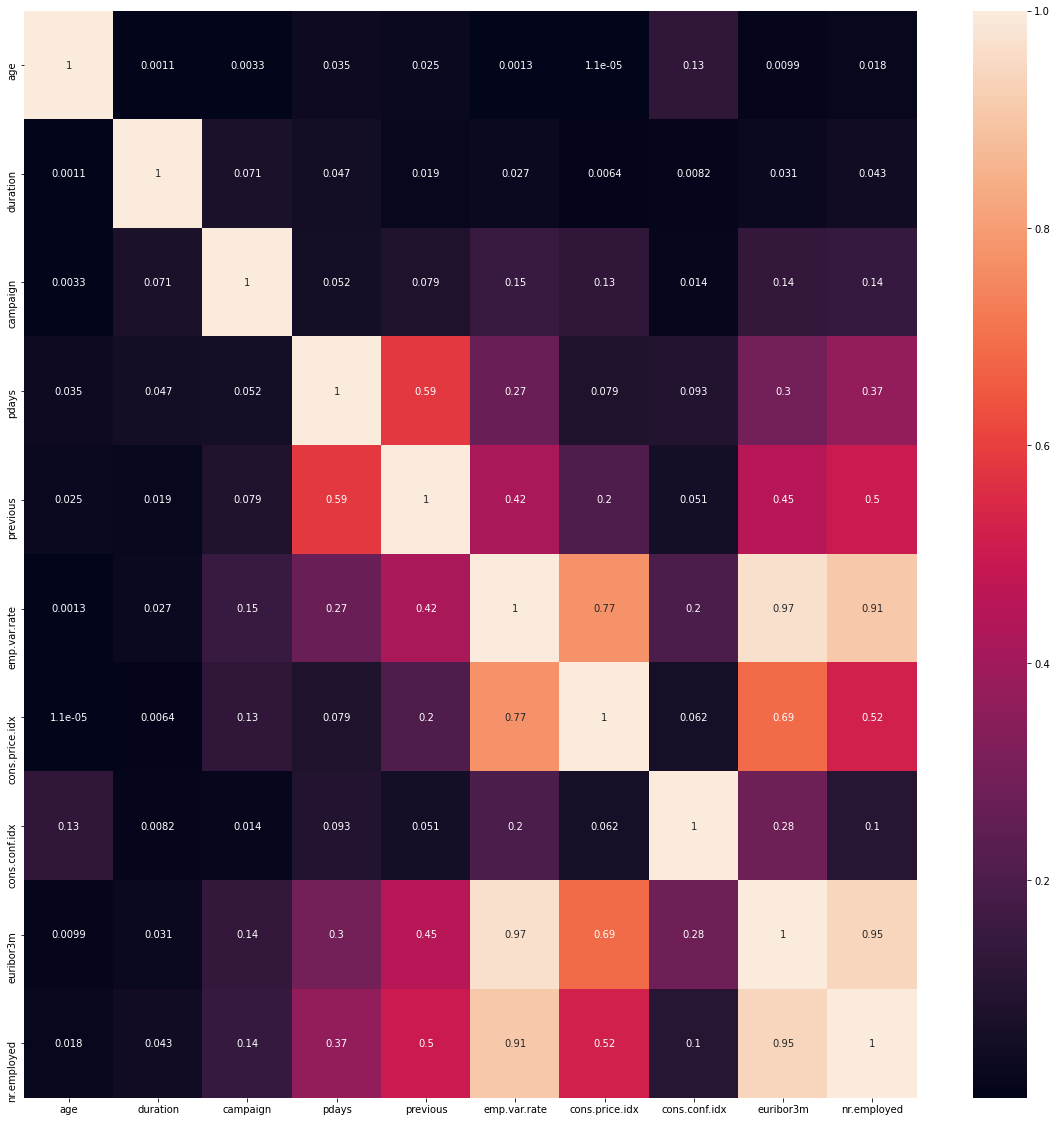

In [32]:
plt.figure(figsize=(20,20))
plt_data =pd.DataFrame(n_scaled,columns=num_col)
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(plt_data.corr().abs(),annot=True)


In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=n_scaled
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables,i) for i in range(variables.shape[1]) ]
vif["Features"] = num_col
vif

,VIF,Features
0,1.018650,age
1,1.009445,duration
2,1.038414,campaign
3,1.610860,pdays
4,1.788150,previous
5,33.104416,emp.var.rate
6,6.361750,cons.price.idx
7,2.648570,cons.conf.idx
8,64.226436,euribor3m
9,31.761997,nr.employed


We remove the columns emp.var.rate,euribor3m and nr.employed since they have high varience


In [34]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
# droping the columns which having hight vif
bank1=bank.drop(['emp.var.rate','euribor3m','nr.employed'], axis=1)

In [36]:
bank1.shape

(39782, 18)

In [37]:
# deviding the dataset
xi=bank1.iloc[:,:-1]
yi=bank1['y']

In [38]:
# created dummy values for the y columun
def dumm(x):
    if x=='no':
        return 0
    else:
        return 1
yi=yi.map(dumm)
yi


0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 39782, dtype: int64

In [39]:
# crating dummies for catogorical columns
string_col=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
xi_inputs=pd.get_dummies(xi,columns=string_col,drop_first=True)

In [40]:
xi_inputs.shape

(39782, 43)

In [41]:
yi.shape

(39782,)

In [42]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(xi_inputs,yi,test_size = 0.3,random_state=42,
                                                   stratify=yi)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
rf.score(x_train,y_train)

1.0

In [45]:
rf.score(x_test,y_test)

0.9125261834939254

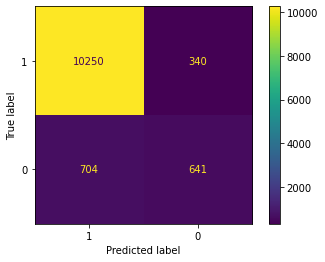

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf,x_test,y_test,values_format='d',display_labels=[1,0])

In [52]:
from sklearn.metrics import f1_score
pred=rf.predict(x_test)
print(f1_score(y_test,pred))

0.5511607910576096


In [47]:
# hyper parameter tunning
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(rf,{'n_estimators':[100,150,200,250],
                  'max_depth':[x for x in range(2,15)],
                   
                   'min_samples_leaf' : range(1,5),
                   'min_samples_split': range(2,10,2),
                   
                  },cv=3,n_jobs =-1,verbose = 3)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 832 candidates, totalling 2496 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done 2496 out of 2496 | elapsed: 52.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 150, 200, 250]},
             verbose=3)

In [50]:
grid.best_params_

{'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [60]:
rf=RandomForestClassifier(max_depth=14,min_samples_leaf=1,min_samples_split=2,
                         n_estimators=250)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9556864294178906

In [61]:
rf.score(x_test,y_test)

0.9103477167993297

In [62]:
from sklearn.metrics import f1_score
pred=rf.predict(x_test)
print(f1_score(y_test,pred))

0.47804878048780486


# ROC_AUC Curve

In [63]:
prob=rf.predict_proba(x_test)

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



In [68]:
auc_score=roc_auc_score(y_test,prob[:,1])
print(auc_score)

0.944261858876474
